# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

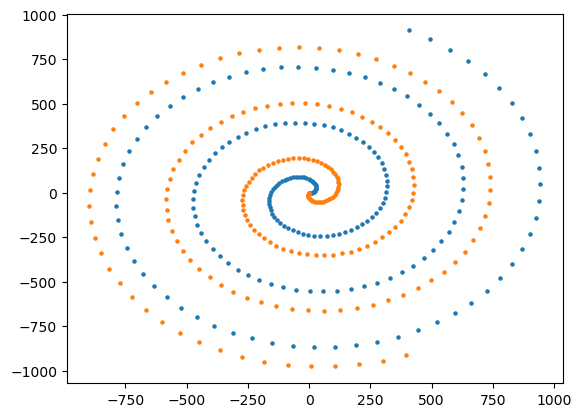

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

C:\Users\andys\AppData\Local\Temp\ipykernel_31604\2939864048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plts
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [9]:
X = df[['X','Y']]
y = df[['CLASS']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [40]:
X_train = X_train / 1000
X_test = X_test / 1000

In [45]:
# Build the model.
model = Sequential([ # as far as we know, all networks are sequential
  Dense(8, activation='relu', input_shape=(2,)), 
  Dense(4, activation='relu'),      
  Dense(6, activation='relu'),      
  Dense(1, activation='sigmoid'),   # the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model.
model.compile(
  optimizer=RMSprop(), #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='binary_crossentropy', #this is how we create the original blame to play the blame game
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  X_train,
  y_train, # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  epochs=2000, # go 20 times through the whole dataset
  batch_size=10, # send 32 images at a time before you tweak the network again, to make it faster
)

# Evaluate the model.
model.evaluate(
  X_train,
  y_train
)

Epoch 1/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.7092 - accuracy: 0.4500
Epoch 2/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.7052 - accuracy: 0.4700
Epoch 3/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.7031 - accuracy: 0.4650
Epoch 4/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.4700
Epoch 5/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.4700
Epoch 6/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.4700
Epoch 7/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.4650
Epoch 8/2000
7/7 [==============================] - 0s 848us/step - loss: 0.6979 - accuracy: 0.4450
Epoch 9/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4650
Epoch 10/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4650
Epoch 11/2000
7/7

[0.5833141207695007, 0.6949999928474426]

In [43]:
model.evaluate(
  X_train,
  y_train
)

7/7 [==============================] - 0s 360us/step - loss: 4.7762e-04 - accuracy: 1.0000


[0.00047761990572325885, 1.0]